In [1]:
print("Experiment 7")

Experiment 7


In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
ds = "sales_data.csv"
df = pd.read_csv(ds, encoding="latin1")

In [2]:
# Drop irrelevant columns
drop_cols = ["ORDERNUMBER", "ORDERDATE", "PHONE", "ADDRESSLINE1", "ADDRESSLINE2", 
             "CITY", "STATE", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME", "CUSTOMERNAME"]
df_clean = df.drop(columns=drop_cols)

# Handle missing values
for col in df_clean.columns:
    if df_clean[col].dtype == "object":
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

C:\Users\YASHDHAVDE\AppData\Local\Temp\ipykernel_22688\1663181906.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\YASHDHAVDE\AppData\Local\Temp\ipykernel_22688\1663181906.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

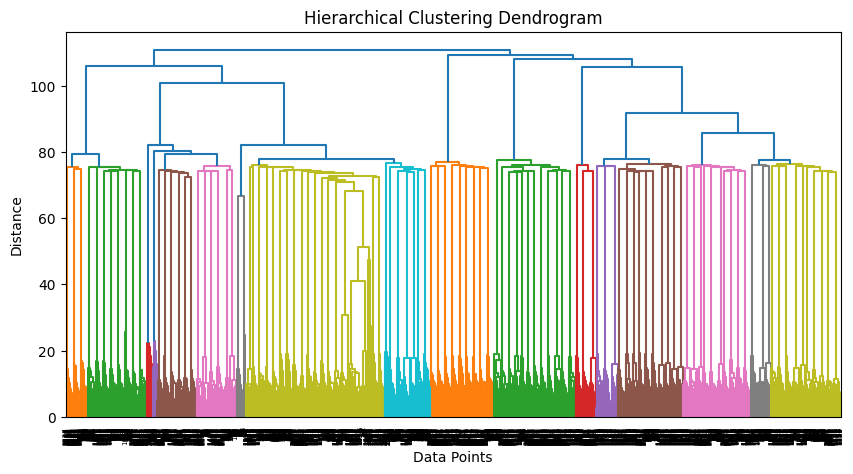

K-Means Silhouette Score: 0.02447512708786482
Hierarchical Clustering Silhouette Score: 0.024661898275330052
DBSCAN Silhouette Score: -0.15209450146723688


In [7]:
# One-Hot Encoding for categorical columns
categorical_cols = df_clean.select_dtypes(include=["object"]).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)

# Apply Hierarchical Clustering
linkage_matrix = linkage(df_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"

# Visualize Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Print Silhouette Scores
print("K-Means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

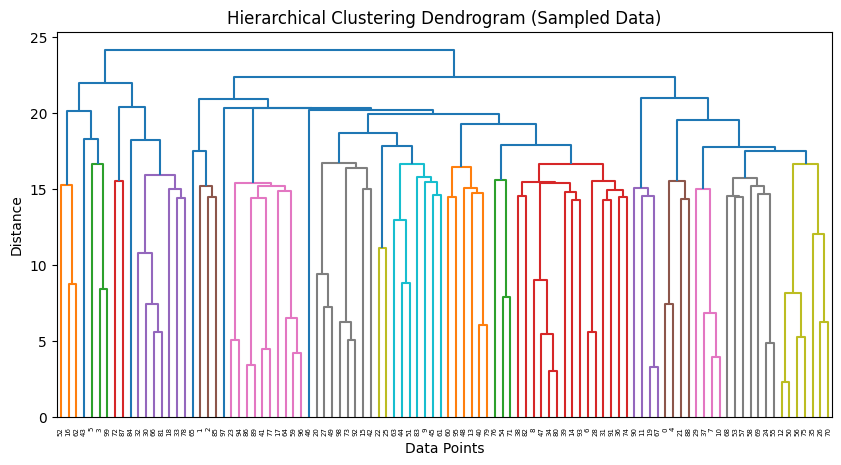

In [6]:
# Sample a subset of data for better visualization (e.g., 500 random rows)
df_sampled = df_clean.sample(n=100, random_state=42)  # Adjust 'n' as needed

# Standardize the sampled data
df_scaled_sampled = scaler.fit_transform(df_sampled)

# Hierarchical Clustering
linkage_matrix = linkage(df_scaled_sampled, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()